# Session 4 : Supervised learning (3/3)

## Preliminaries

Run the script `datasets.py` like you did in the last notebook to load the functions used to generate artificial datasets.

In [1]:
%run datasets.py

## Support Vector Machine

### Toy dataset

In [2]:
# create a dataset of 300 points with make_forge()
# and split it into a 270 points training set and 
# 30 points test set

X, y = make_forge(n_samples=300)

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

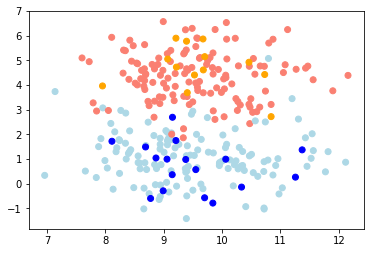

In [4]:
# print the training points on a 2d figure. Points with class
# 1 should have the color 'salmon' and points with the class
# 0 should have the color 'lightblue'

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(X_train[:,0], X_train[:,1], c=['salmon' if ytrue else 'lightblue' for ytrue in y_train])

# print the test points on the same figure with color 'orange'
# for class 1 and 'blue' for class 0

plt.scatter(X_test[:,0], X_test[:,1], c=['orange' if ytrue else 'blue' for ytrue in y_test])

In [5]:
# create a SVM model for classification with SVC class.
# Use a linear kernel. Train it and evaluate its accuracy

def fit_and_score(model_class, X_train, X_test, y_train, y_test, *args, **kwargs):
    model = model_class(*args, **kwargs)
    model.fit(X_train, y_train)
    print("building {} model with {} parameters:".format(model_class.__name__, len(args) + len(kwargs)),
          ', '.join(["arg {} = {}".format(i, args[i]) for i in range(len(args))]
                    + ["{} = {}".format(kwarg, kwargs[kwarg]) for kwarg in kwargs]))
    print(" | score on train set:", model.score(X_train, y_train))
    print(" | score on test set:", model.score(X_test, y_test))
    return model

from sklearn.svm import SVC
model = fit_and_score(SVC, X_train, X_test, y_train, y_test, kernel='linear', random_state=1)

# how many support vectors have been found for each class ? Print them
print()
print(*["there is {} support vectors for class {}".format(model.n_support_[iclass], iclass)
        for iclass in [0, 1]],
      sep='\n')

print()
print("the support vectors are:")
print(model.support_vectors_)

building SVC model with 2 parameters: kernel = linear, random_state = 1
 | score on train set: 0.9398496240601504
 | score on test set: 0.9666666666666667

there is 21 support vectors for class 0
there is 20 support vectors for class 1

the support vectors are:
[[10.79544727  5.07178775]
 [ 9.13324284  2.05381956]
 [ 8.41678945  2.13801349]
 [10.74187367  2.5005829 ]
 [ 8.26530669  2.96705005]
 [ 9.03763281  2.14664757]
 [ 8.7337095   2.49162431]
 [ 7.1385322   3.73144858]
 [11.42846765  1.85948594]
 [ 9.74865495  2.67704349]
 [ 9.47511391  2.8142105 ]
 [ 9.06378762  2.07848831]
 [10.56981018  2.5445225 ]
 [11.30931617  2.61755141]
 [ 7.9567305   3.06996714]
 [11.5441608   2.02227931]
 [ 9.49906632  2.934728  ]
 [11.20011198  3.44465915]
 [ 8.09438469  2.43920198]
 [10.2249846   2.22701235]
 [ 8.34968356  2.85989656]
 [ 9.34018509  2.22490319]
 [10.64605223  3.10125781]
 [10.47472507  2.43248906]
 [10.03553468  2.71101901]
 [ 9.84929493  2.94933491]
 [ 8.93451077  3.2444323 ]
 [ 9.3356

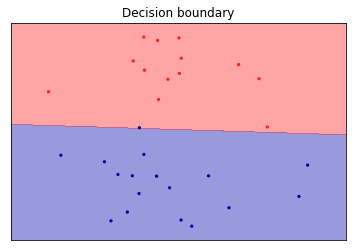

There is 1 misclassified examples


In [6]:
%run plots.py
figure = plt.figure()

# visualize the decision boundary of your SVM. How many 
# points are misclassified ? Is your dataset linearly 
# separable ? Do you think it would be possible to improve 
# the accuracy of the model ? Explain why.

plot_2d_separator(model, X_test, y_test, fill=True, eps=0.5, alpha=0.4)
plt.title("Decision boundary")
plt.show()
s = model.score(X_test, y_test)

print("There is {} misclassified examples".format(int(round((1-s)*len(X_test)))))

**Answer:** This dataset is not linearly separable (see `Out[4]`). It seems difficult to improve the accuracy of the model because the only misclassified test point is an outlier.

building SVC model with 2 parameters: C = 0.01, random_state = 1
 | score on train set: 0.7631578947368421
 | score on test set: 0.8
 | there was 6 misclassified examples


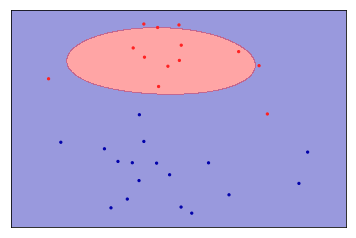

building SVC model with 2 parameters: C = 0.1, random_state = 1
 | score on train set: 0.9360902255639098
 | score on test set: 0.9666666666666667
 | there was 1 misclassified examples


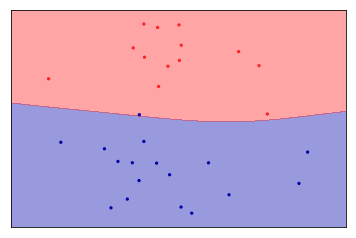

building SVC model with 2 parameters: C = 1, random_state = 1
 | score on train set: 0.9398496240601504
 | score on test set: 0.9666666666666667
 | there was 1 misclassified examples


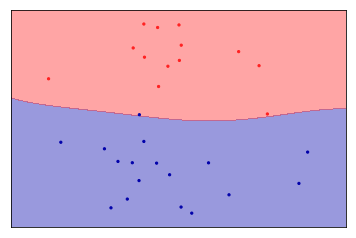

building SVC model with 2 parameters: C = 10, random_state = 1
 | score on train set: 0.9511278195488722
 | score on test set: 0.9666666666666667
 | there was 1 misclassified examples


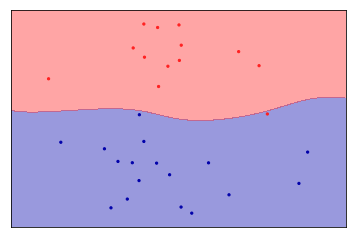

building SVC model with 2 parameters: C = 100, random_state = 1
 | score on train set: 0.9661654135338346
 | score on test set: 0.9666666666666667
 | there was 1 misclassified examples


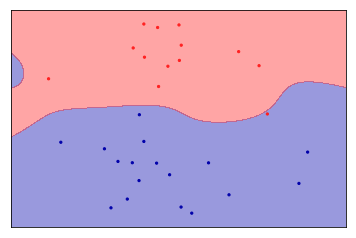

In [7]:
# train 5 other SVM with a modified value for the penalty and
# plot the decision boundary for each one.
# explain the effect of this parameter (what happend if we 
# increase/decrease it ?)
# Do you think it can help to prevent underfitting or 
# overfitting ?
for C in [10**i for i in range(-2, 3)]:
    model = fit_and_score(SVC, X_train, X_test, y_train, y_test, C=C, random_state=1)
    s = model.score(X_test, y_test)
    print(" | there was {} misclassified examples".format(int(round((1-s)*len(X_test)))))
    plt.figure()
    plot_2d_separator(model, X_test, y_test, fill=True, eps=0.5, alpha=0.4)
    plt.show()

**Answer:** The penality parameter C makes make the model train slower or harder.
A big value prevent underfitting but favour overfitting, and vice versa.

### Real case dataset

In [9]:
# load the breast cancer dataset and train a linear SVC model
# on this dataset. You can create several models and adjust
# the value of the penalty parameter to find the optimal one.
# Can you get a better accuracy than the KNN model (it was 
# 0.923?)

In [10]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size=0.1, random_state=1)

In [18]:
for C in [10**i for i in range(-2, 3)]:
    model = fit_and_score(SVC, X_train, X_test, y_train, y_test, kernel='linear', C=C, random_state=1)
    s = model.score(X_test, y_test)
    print(" | there was {} misclassified examples".format(int(round((1-s)*len(X_test)))))

building SVC model with 3 parameters: kernel = linear, C = 0.01, random_state = 1
 | score on train set: 0.955078125
 | score on test set: 0.9649122807017544
 | there was 2 misclassified examples
building SVC model with 3 parameters: kernel = linear, C = 0.1, random_state = 1
 | score on train set: 0.962890625
 | score on test set: 0.9473684210526315
 | there was 3 misclassified examples
building SVC model with 3 parameters: kernel = linear, C = 1, random_state = 1
 | score on train set: 0.9609375
 | score on test set: 0.9824561403508771
 | there was 1 misclassified examples
building SVC model with 3 parameters: kernel = linear, C = 10, random_state = 1
 | score on train set: 0.96875
 | score on test set: 1.0
 | there was 0 misclassified examples
building SVC model with 3 parameters: kernel = linear, C = 100, random_state = 1
 | score on train set: 0.9609375
 | score on test set: 1.0
 | there was 0 misclassified examples


**Answer:** We can get up to 96.9 accuracy, which is better than the KNN model (~0.923)

# Neural Networks

## Activation functions

The activation function $f$ of a neuron can be linear or non linear. The most used activation functions are :
* sigmoid
* tanh
* ReLu (rectified linear)

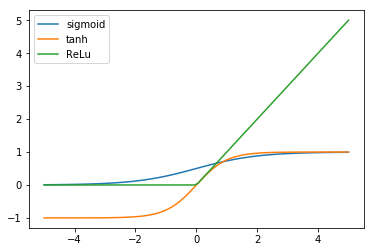

In [30]:
# using the example for sigmoid, plot the representation of
# tanh and ReLu on the same graph. ReLu is defined as :
# ReLu(x) = max(0, x)

import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def relu(x):
    return [max(0, a) for a in x]

x = np.linspace(-5, 5, 100)

figure = plt.figure()
plt.plot(x, sigmoid(x), label="sigmoid")
plt.plot(x, np.tanh(x), label="tanh")
plt.plot(x, relu(x), label="ReLu")
plt.legend()
plt.show()

### Tuning a neural network

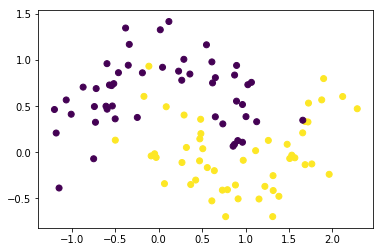

In [13]:
# we use a non linearly separable dataset that looks
# like two moons
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

As you can see, using a linear SVM does not seem to be the best choice. Let's use neural networks to be able to classify this dataset. First, split the data into a training and a test set.

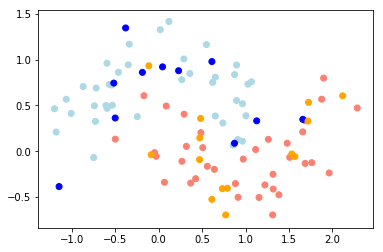

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

plt.scatter(X_train[:,0], X_train[:,1], c=['salmon' if ytrue else 'lightblue' for ytrue in y_train])
plt.scatter(X_test[:,0], X_test[:,1], c=['orange' if ytrue else 'blue' for ytrue in y_test])

In [39]:
# create a neural network with all default parameters.
# Compute its accuracy and print its decision boundary
# Do you think the neural network is good ? Explain why.

from sklearn.neural_network import MLPClassifier
fit_and_score(MLPClassifier, X_train, X_test, y_train, y_test, random_state=3);

building MLPClassifier model with 1 parameters: random_state = 3
 | score on train set: 0.88
 | score on test set: 0.8


C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [43]:
MLPClassifier?

In [44]:
# there exist different algorithms to train a neural network.
# the default one is called 'adam'. Use the documentation
# to know what are the other kind of algorithm. Create 
# other networks with each type of algorithm. Which one is
# the best ?

for optimizer in ['lbfgs', 'sgd', 'adam']:
    fit_and_score(MLPClassifier, X_train, X_test, y_train, y_test, solver=optimizer, random_state=3)

building MLPClassifier model with 2 parameters: solver = lbfgs, random_state = 3
 | score on train set: 1.0
 | score on test set: 0.88
building MLPClassifier model with 2 parameters: solver = sgd, random_state = 3
 | score on train set: 0.7866666666666666
 | score on test set: 0.76
building MLPClassifier model with 2 parameters: solver = adam, random_state = 3
 | score on train set: 0.88
 | score on test set: 0.8


C:\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [16]:
# by default, the neural network has only 1 hidden layer of
# 100 neurons. Use the right parameter to create a network of
# 2 hidden layers, each one having 10 neurons.

# Create other networks with different parameters to see if
# many small layers is better than 1 big layer.

In [17]:
# You can also modify the activation function of the neurons 
# in your network. Create a network for each type of
# activation. Which one is the best ?